In [1]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


2022-07-12 11:20:56.344016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 11:20:56.344037: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow version: 2.9.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/handtyped_nn/train.csv')

In [5]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

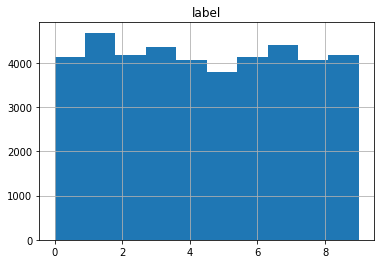

In [6]:
data.hist('label')

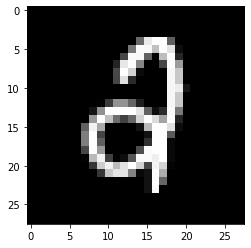

In [7]:
plt.imshow(data.values[10000][1:].reshape(28, 28), cmap='gray')

In [8]:
def split_data_1to1(data):
    test = data[::2]
    train = data[1::2]
    sns.displot(test['label'], bins=10, kde=True);
    sns.displot(train['label'], bins=10, kde=True);
    return test, train

def split_data_1to2(data):
    test = data[::3]
    train = pd.concat([data, test]).drop_duplicates(keep=False)
    sns.displot(test['label'], bins=10, kde=True);
    sns.displot(train['label'], bins=10, kde=True);
    return test, train

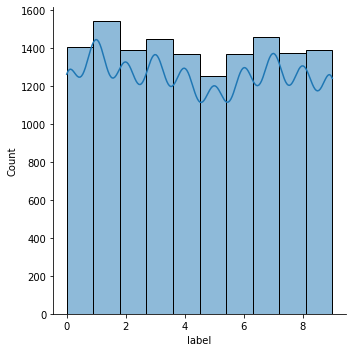

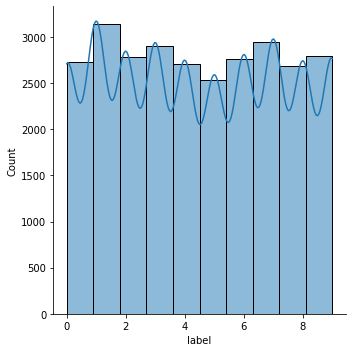

In [9]:
test, train = split_data_1to2(data)

/home/but/venv/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


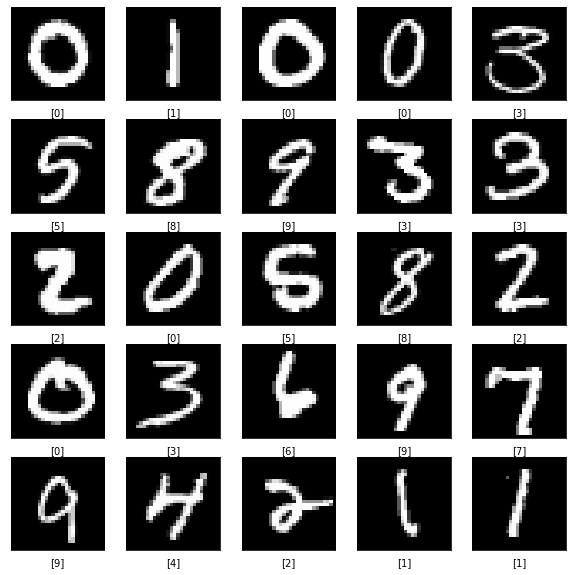

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train.values[i][1:].reshape(28, 28), cmap='gray')
    plt.xlabel(train.values[i][:1])
plt.show()


In [248]:
shapes=[784, 49, 16, 10]

#sigmoid - 64%
#softmax - 66%
#relu - 63%
#softplus - 60%

#filters - 
_filters = 16
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=_filters, kernel_size=(3, 3), activation='softplus', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((4, 4)))

model.add(tf.keras.layers.Conv2D(filters=_filters, kernel_size=(3, 3), activation='softplus'))
model.add(tf.keras.layers.Conv2D(filters=_filters, kernel_size=(3, 3), activation='softplus'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(filters=_filters, kernel_size=(1, 1), activation='softplus'))
model.add(tf.keras.layers.Conv2D(filters=_filters, kernel_size=(1, 1), activation='softplus'))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softplus'))


In [249]:
#categorical_crossentropy - 60-66%
#mean_absolute_error - 10-15%
#mse - 60-63%

#adam - 65%


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [250]:
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 conv2d_72 (Conv2D)          (None, 2, 2, 16)          2320      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 1, 1, 16)        

In [251]:
_train_imgs = [row.values.reshape(28, 28) for index, row in train.drop(labels='label', axis=1).iterrows()]
train_imgs = tf.stack(_train_imgs)

In [252]:
def get_expected(num):
    return [1 if k == num else 0 for k in range(10)]

In [253]:
_train_labels = [get_expected(row) for row in train['label']]
train_labels = tf.stack(_train_labels)

In [254]:
_test_imgs = [row.values.reshape(28, 28) for index, row in test.drop(labels='label', axis=1).iterrows()]
test_imgs = tf.stack(_test_imgs)
_test_labels = [get_expected(row) for row in test['label']]
test_labels = tf.stack(_test_labels)

In [255]:
model.predict(train_imgs[:2])

1/1 [==============================] - 0s 79ms/step


array([[1.4926509e+00, 2.8170171e+00, 8.9425206e-10, 1.0400478e+01,
        5.0064386e-04, 5.9187639e-01, 4.6272082e+00, 8.8414364e+00,
        1.9793373e-05, 7.1038446e+00],
       [7.0810432e+00, 9.7324848e+00, 1.7053542e-07, 7.9537988e+00,
        3.7584182e-02, 3.1839028e-01, 1.4843473e+00, 1.3286806e+01,
        2.3881721e-03, 5.9099903e+00]], dtype=float32)

In [256]:
train_imgs.shape

TensorShape([28000, 28, 28])

In [257]:
history = model.fit(train_imgs,
                   train_labels,
                   epochs=25,
                   validation_data = (
                       test_imgs,
                       test_labels
                       )
                   )

Epoch 1/25
875/875 [==============================] - 8s 8ms/step - loss: 0.8894 - accuracy: 0.7288 - val_loss: 0.3318 - val_accuracy: 0.9008
Epoch 2/25
875/875 [==============================] - 7s 8ms/step - loss: 0.2235 - accuracy: 0.9333 - val_loss: 0.2149 - val_accuracy: 0.9391
Epoch 3/25
875/875 [==============================] - 7s 8ms/step - loss: 0.1491 - accuracy: 0.9554 - val_loss: 0.1450 - val_accuracy: 0.9565
Epoch 4/25
875/875 [==============================] - 7s 8ms/step - loss: 0.1191 - accuracy: 0.9647 - val_loss: 0.1182 - val_accuracy: 0.9656
Epoch 5/25
875/875 [==============================] - 7s 8ms/step - loss: 0.0968 - accuracy: 0.9716 - val_loss: 0.1092 - val_accuracy: 0.9704
Epoch 6/25
875/875 [==============================] - 7s 8ms/step - loss: 0.0862 - accuracy: 0.9743 - val_loss: 0.0976 - val_accuracy: 0.9724
Epoch 7/25
875/875 [==============================] - 8s 9ms/step - loss: 0.0769 - accuracy: 0.9769 - val_loss: 0.1455 - val_accuracy: 0.9607
Epoch 

In [258]:
#model.save_weights('./models/97acc_model')


--------------------------------------------------

In [115]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:03


In [130]:
import torch
from torch import nn

In [228]:
shapes=[784, 49, 16, 10]

#Sigmoid - 88%
#Relu - 10%
#SoftPlus - 11%
#LeakyReLU - 88%
#LogSigmoid - 10%
#Hardsigmoid - 78

kernel_size = 1

model = torch.nn.Sequential(
    nn.Linear(shapes[0], shapes[1], kernel_size),
    nn.Sigmoid(),
    nn.Linear(shapes[1], shapes[2], kernel_size),
    nn.Sigmoid(),
    nn.Linear(shapes[2], shapes[3], kernel_size),
    nn.Sigmoid(),
)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 0.001
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [229]:
def check_correct(model, test):
    correct = 0
    for index, row in test.iterrows():
        img = torch.FloatTensor(row.values[1:])
        pred = model(img)
        res = torch.argmax(pred)
        if res.item() == row.values[:1][0]:
            correct+=1
    return correct/len(test)

In [230]:
epochs = 20
for e in range(epochs):
    for index, row in train.iterrows():
        img = torch.FloatTensor(row.values[1:])
        pred = model(img)
        expect = torch.FloatTensor([1 if k == row.values[:1] else 0 for k in range(10)])
        loss = loss_fn(pred, expect)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("e{}, corr = {}".format(e, check_correct(model, test)))


e0, corr = 0.8060714285714285
e1, corr = 0.8325714285714285
e2, corr = 0.8463571428571428
e3, corr = 0.8636428571428572
e4, corr = 0.8622142857142857
e5, corr = 0.8652142857142857
e6, corr = 0.8722857142857143
e7, corr = 0.8766428571428572
e8, corr = 0.878
e9, corr = 0.8842142857142857
e10, corr = 0.8812142857142857
e11, corr = 0.8741428571428571
e12, corr = 0.8842142857142857
e13, corr = 0.8839285714285714
e14, corr = 0.8866428571428572
e15, corr = 0.8926428571428572
e16, corr = 0.8887857142857143
e17, corr = 0.8935714285714286
e18, corr = 0.8930714285714285
e19, corr = 0.8929285714285714
